In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('/content/Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


by seeing info we can say there are no null tupples and data types are perfect without any mismatch

**1. Analyse the data using the visualizations**

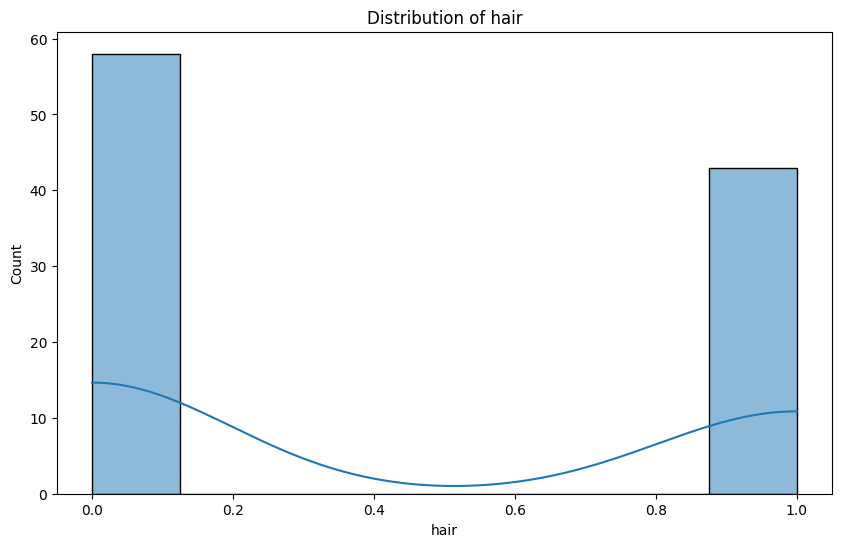

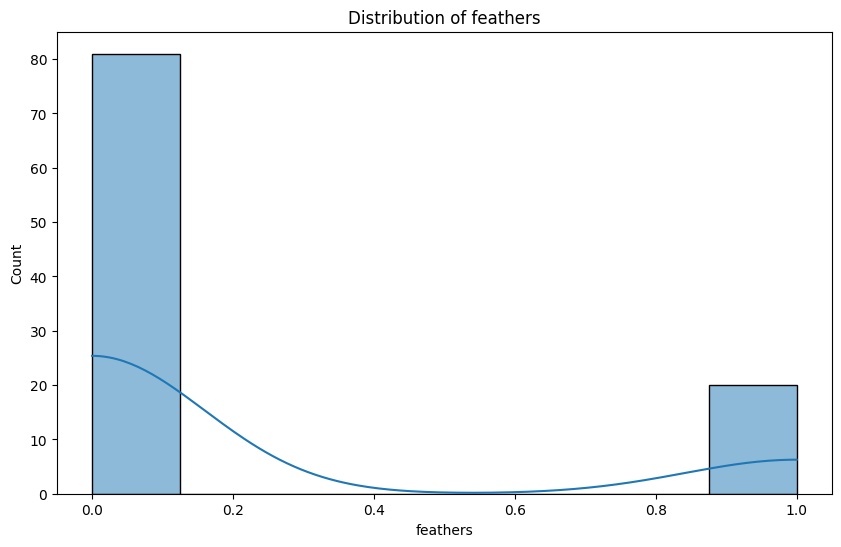

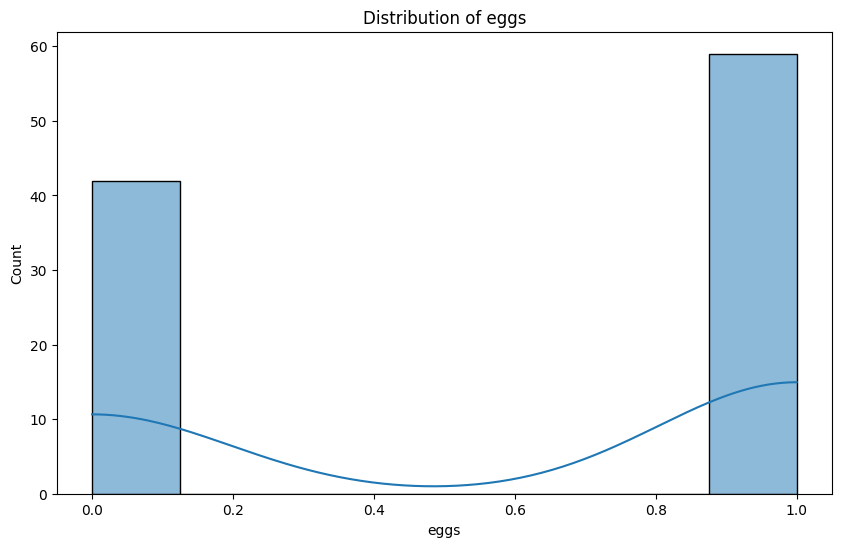

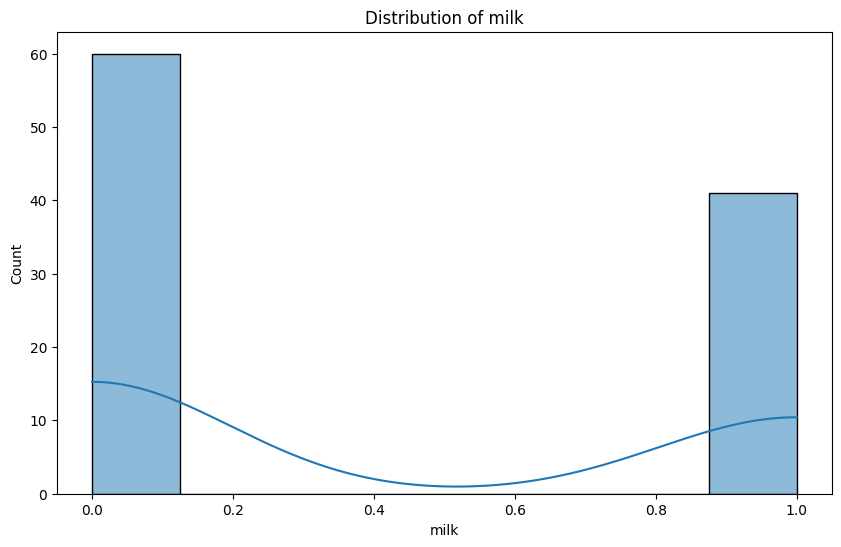

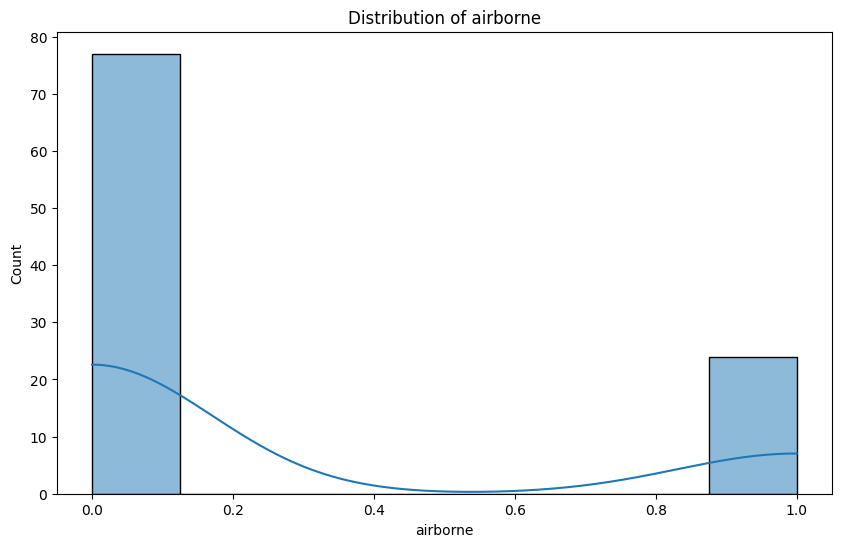

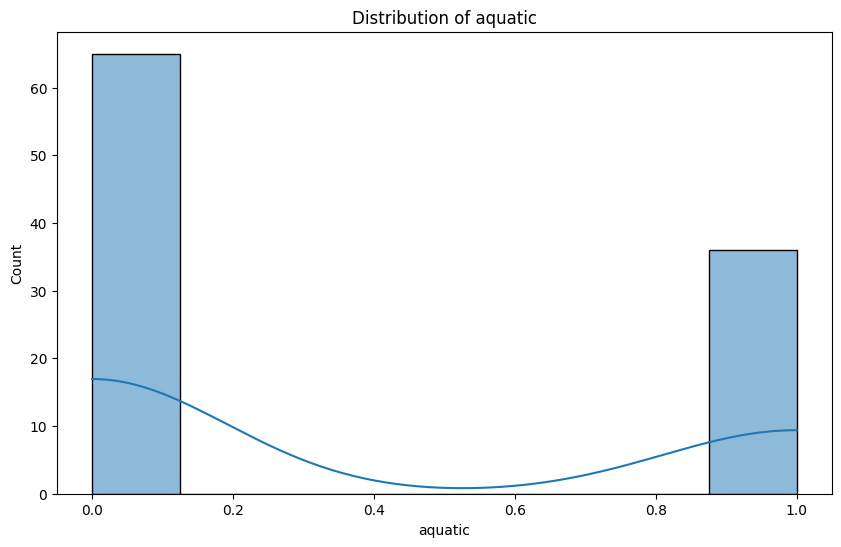

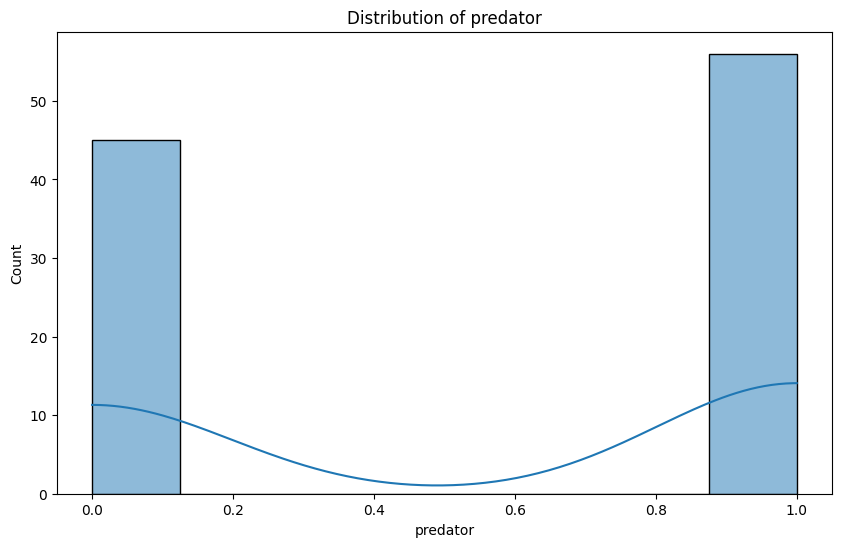

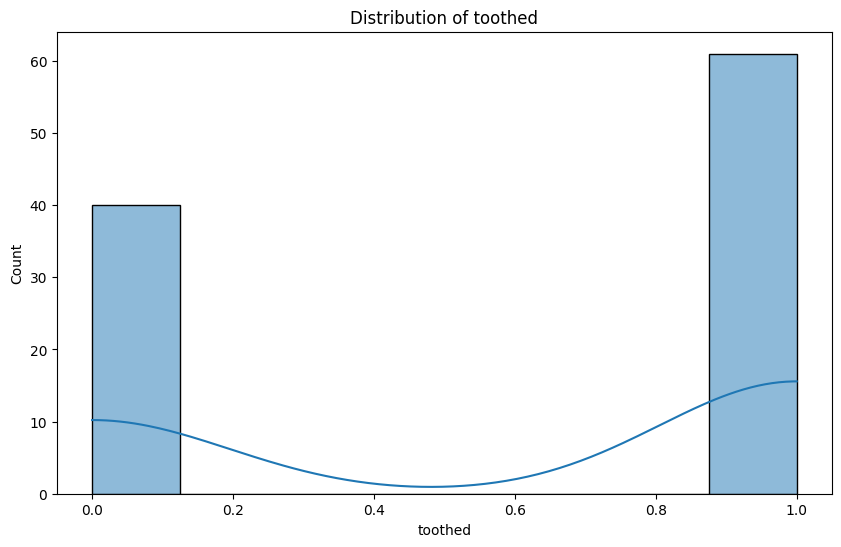

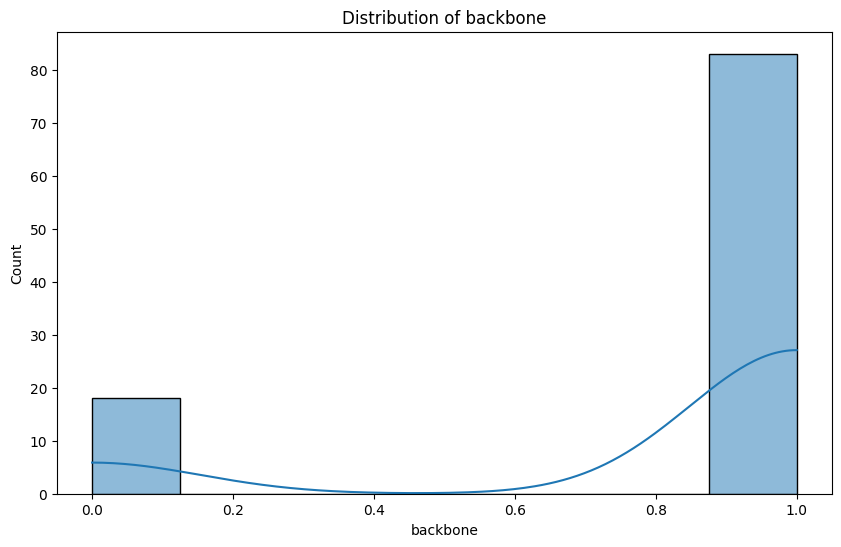

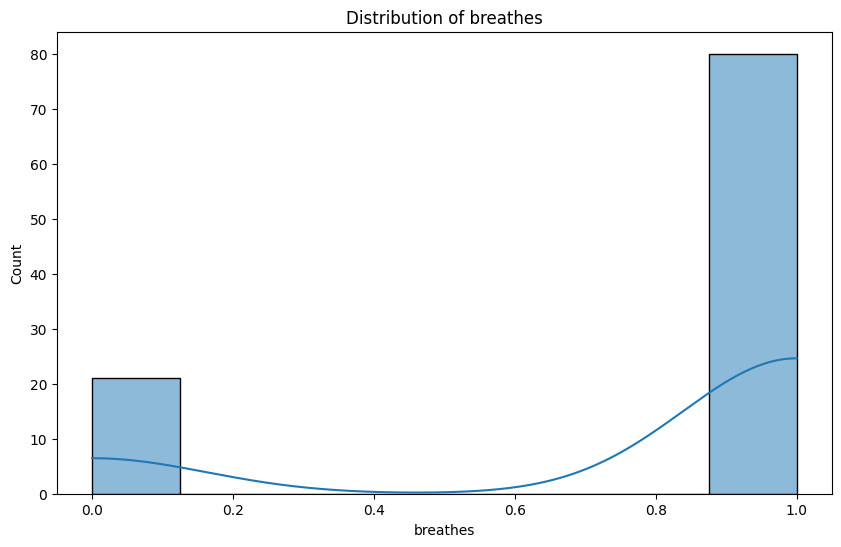

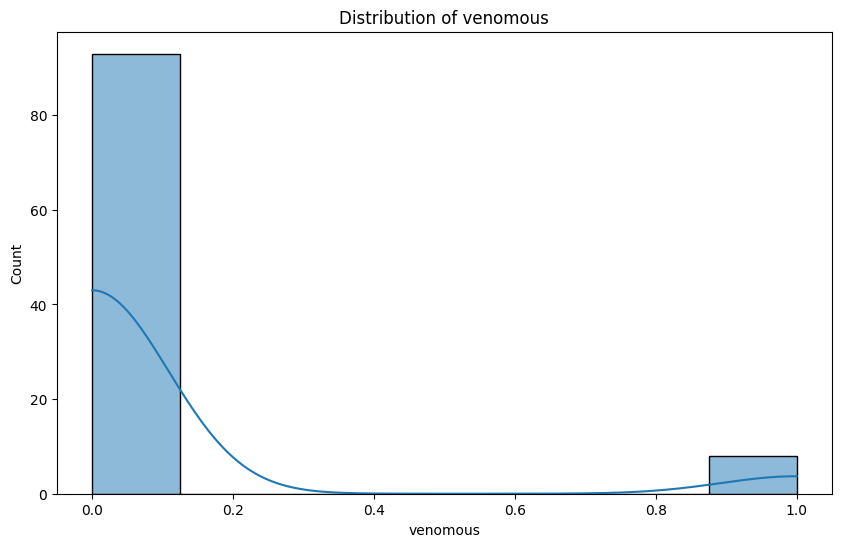

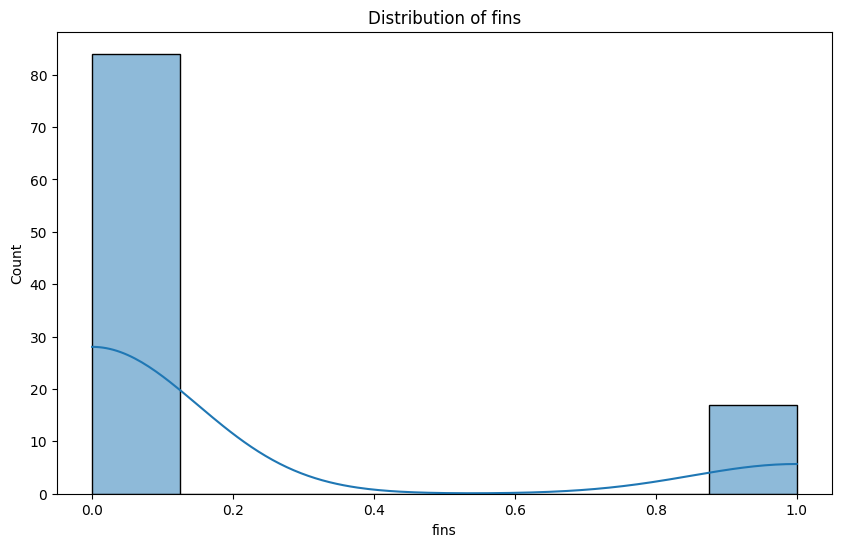

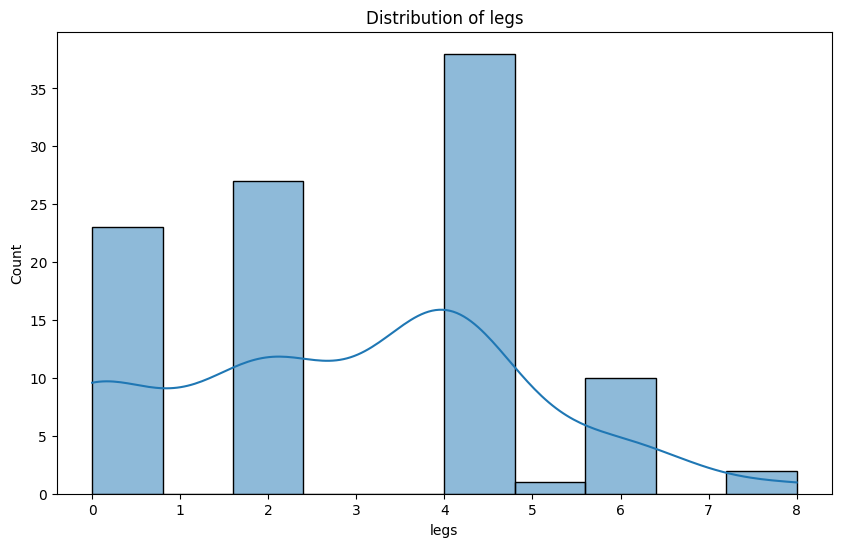

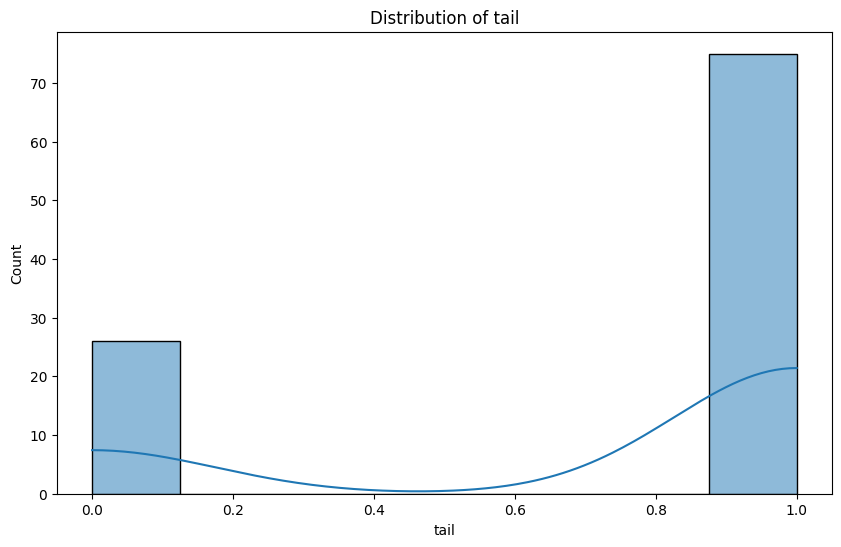

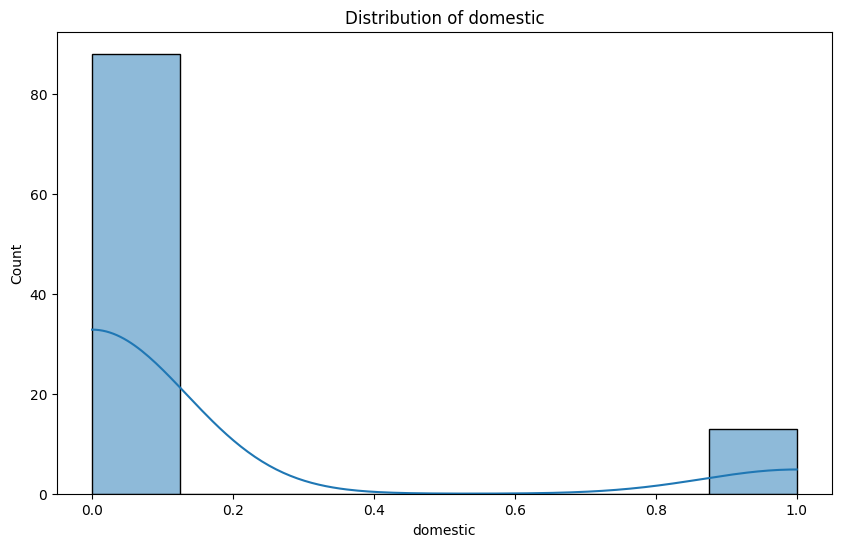

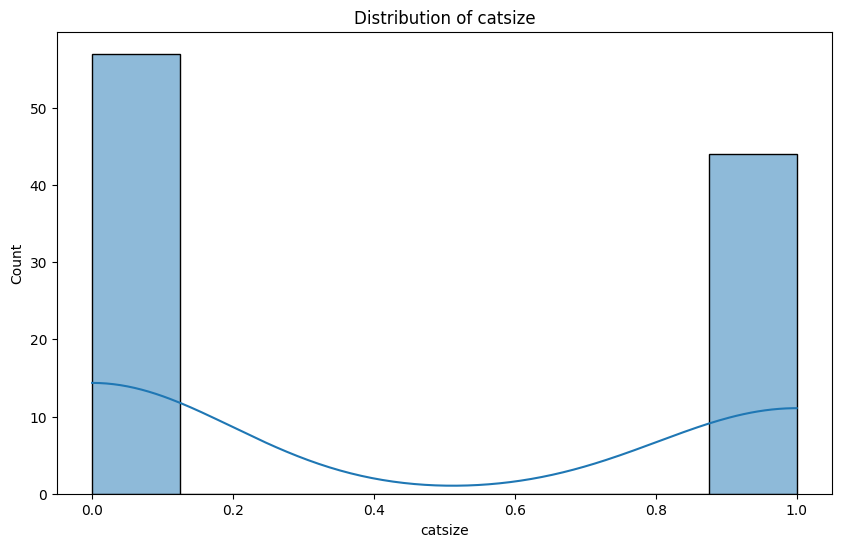

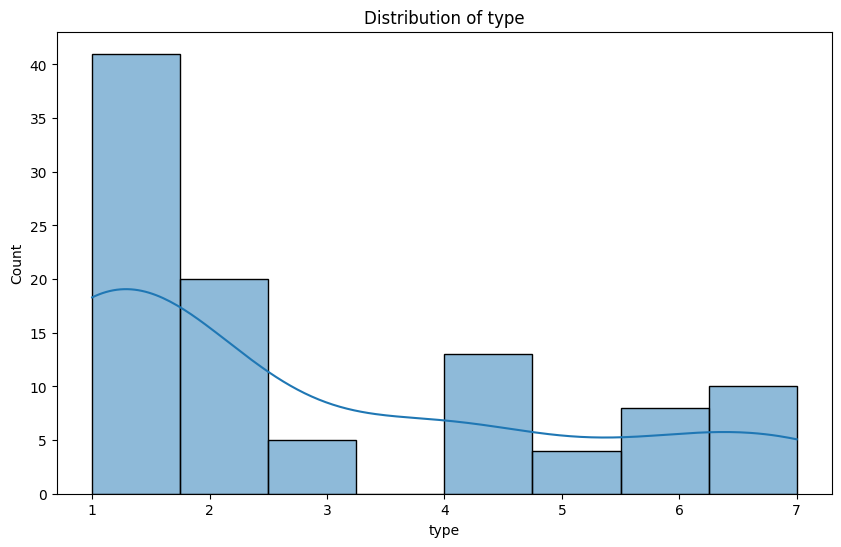

In [68]:
for column in df.columns:
  if df[column].dtype != 'object':
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

if we observe the histogram of all numerical columns we can identifie the features of the animals and in the form of 0 and 1 and so on

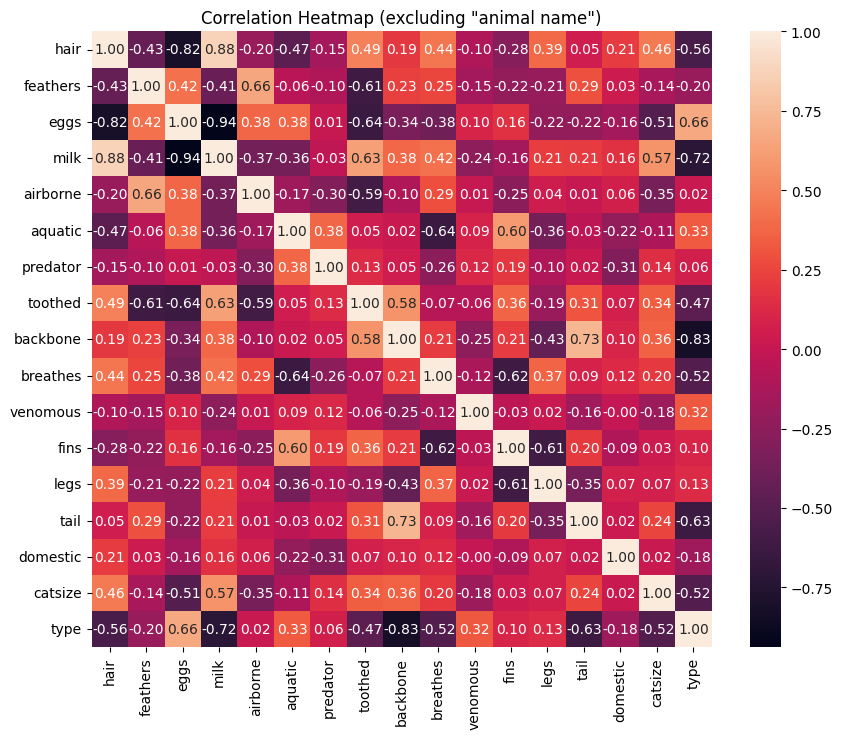

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap (excluding "animal name")')
plt.show()

with this we can see the relation ship of two variables which helps us to understand the characteristics of an animal

**2. Preprocess the data by handling missing values & Outliers, if any.**

In [70]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


there are no null tupples and comming to outliers no need of checkinh it because there are o and 1 and other factors are real

**3. Split the dataset into training and testing sets (80% training, 20% testing).**

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop(['animal name', 'type'], axis=1) # Features (all columns except animal name and target)
y = df['type'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier instance
knn = KNeighborsClassifier(n_neighbors=4) # can choose the number of neighbors (k)

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

# 5. Choose an appropriate distance metric and value for K.

Accuracy for K=1: 1.0000
Accuracy for K=2: 1.0000
Accuracy for K=3: 0.9524
Accuracy for K=4: 0.9524
Accuracy for K=5: 0.9048
Accuracy for K=6: 0.9048
Accuracy for K=7: 0.8571
Accuracy for K=8: 0.8571
Accuracy for K=9: 0.8571
Accuracy for K=10: 0.8571


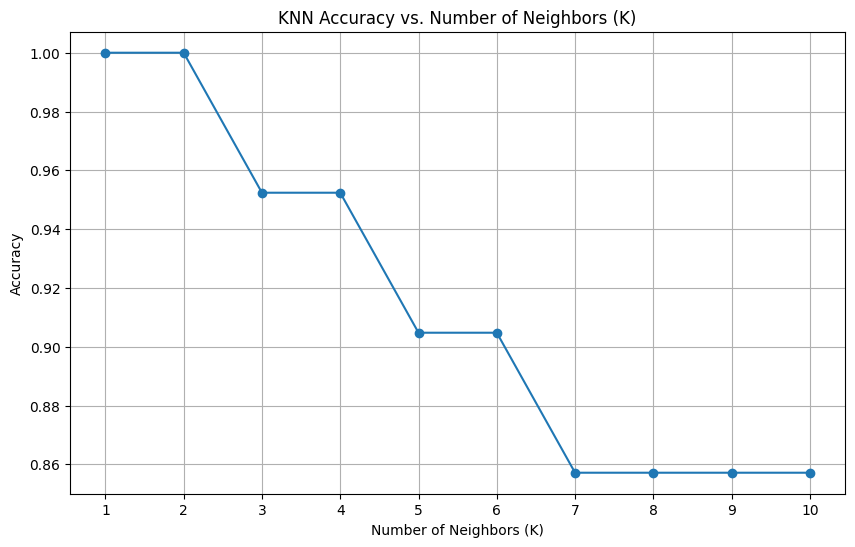


Chosen distance metric: Euclidean
Chosen value for K based on evaluation: 4


In [80]:
from sklearn.metrics import accuracy_score

k_range = range(1, 11)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # Using Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for K={k}: {accuracy:.4f}")

# Plotting the accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = 4 # Replace with the actual best K found from the plot/results
print(f"\nChosen distance metric: Euclidean")
print(f"Chosen value for K based on evaluation: {best_k}")

**6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.**

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set using the best K found
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification

print("\nClassifier Performance Metrics on Testing Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Classifier Performance Metrics on Testing Set:
Accuracy: 0.9524
Precision: 0.9206
Recall: 0.9524
F1-score: 0.9333


Your classifier is performing quite well! An accuracy of 95.24% indicates that the model is correctly classifying most instances.
- Precision (92.06%) shows that when the model predicts a positive class, it is correct about 92% of the time. This is crucial if false positives are costly.
- Recall (95.24%) means that it successfully captures 95% of the actual positive cases, which is great for scenarios where missing positives is undesirable.
- F1-score (93.33%) balances precision and recall, showing that the model achieves a solid trade-off


**7. Visualize the decision boundaries of the classifier.**

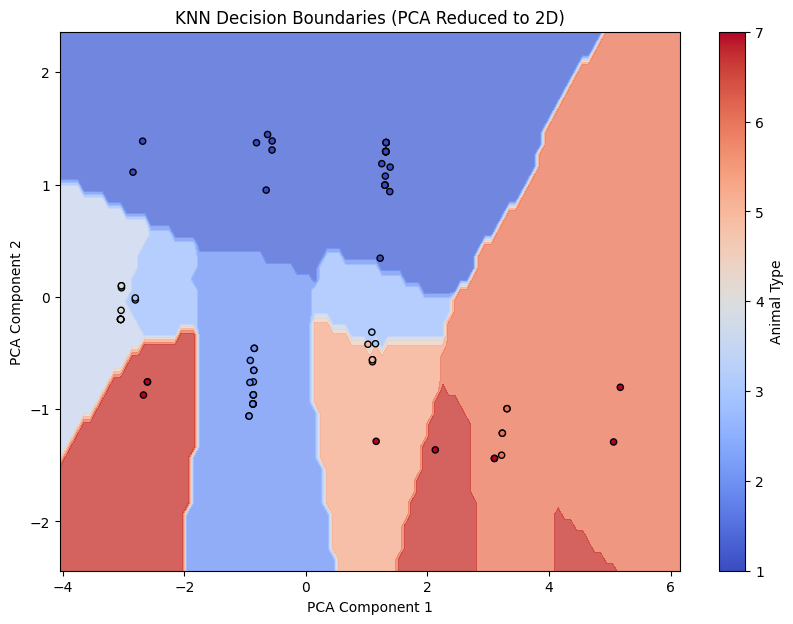

In [83]:
from sklearn.decomposition import PCA

# Reduce the dimensions of the data for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a KNN classifier on the PCA reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundaries (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Animal Type')
plt.show()

# Interview Questions:

**1. What are the key hyperparameters in KNN?**

In **K-Nearest Neighbors (KNN)**, key hyperparameters impact performance and accuracy. Here are the most important ones:

- **K (Number of Neighbors):** Defines how many nearest neighbors the algorithm considers when making predictions. A smaller K makes the model sensitive to noise, while a larger K smooths out predictions.
- **Distance Metric:** Determines how similarity is measured between points. Common choices include **Euclidean distance**, **Manhattan distance**, and **Minkowski distance**.
- **Weighting Scheme:** Decides whether all neighbors are treated equally or weighted based on distance. Uniform weighting treats all neighbors the same, while distance-based weighting gives closer neighbors more influence.
- **Algorithm Choice:** Determines the search algorithm for finding nearest neighbors. Options include **brute-force** and **KD-Tree**, where KD-Tree speeds up searches in high-dimensional spaces.
- **Leaf Size (for KD-Tree or Ball-Tree):** Impacts tree-based searches by controlling partitioning efficiency in space.
- **P (for Minkowski Distance):** Defines the power parameter when Minkowski distance is used, where **p=2** corresponds to Euclidean distance, and **p=1** corresponds to Manhattan distance.


**2. What distance metrics can be used in KNN?**

In **K-Nearest Neighbors (KNN)**, the choice of distance metric affects how similarity between points is measured. Here are the most commonly used ones:

- **Euclidean Distance:** The most widely used metric, calculated as the straight-line distance between points. Best for continuous data.
- **Manhattan Distance:** Measures the absolute differences between points along each dimension. Ideal for grid-based data, such as city block layouts.
- **Minkowski Distance:** A generalized version of Euclidean and Manhattan distances, controlled by a parameter \(p\). When \(p = 1\), it becomes Manhattan distance; when \(p = 2\), it becomes Euclidean.
- **Chebyshev Distance:** Takes the largest absolute difference between any dimension, useful in scenarios where maximum deviation matters.
- **Mahalanobis Distance:** Accounts for correlations among features, making it useful for datasets with different scales and variances.
- **Cosine Similarity:** Measures the cosine of the angle between two vectors rather than distance itself. Often applied in text analysis and high-dimensional data.